# Bias correction of numerical prediction model temperature forecast Data Set



https://archive.ics.uci.edu/ml/datasets/Bias+correction+of+numerical+prediction+model+temperature+forecast

### Data Set Information:

#### This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset
df=pd.read_csv('Bias_correction_ucl.csv')

In [3]:
#shape
df.shape

(7752, 25)

In [4]:
#first 5 rows
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail(2)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
station             7750 non-null float64
Date                7750 non-null object
Present_Tmax        7682 non-null float64
Present_Tmin        7682 non-null float64
LDAPS_RHmin         7677 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_Tmin_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT2          7677 non-null float64
LDAPS_PPT3          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope       

In [8]:
#check null
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
#check null
df[df['station'].isna()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [10]:
df[df['Date'].isna()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [11]:
for I in df.columns:
    print(df[df[I].isna()])  # all null values in the rows wise Find null Values 

      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH    ...      \
7750         17.624954         14.272646   2.882580  -13.603212    ...       
7751         38.542255         29.619342  21.857621  213.414006    ...       

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]
      station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.79

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  2013-08-10          27.1          24.5          NaN   
1026      2.0  2013-08-10          29.7          25.4          NaN   
1027      3.0  2013-08-10          29.1          25.9          NaN   
1028      4.0  2013-08-10          30.8          27.3          NaN   
1029      5.0  2013-08-10          29.7          25.7          NaN   
1030      6.0  2013-08-10          29.6          26.4          NaN   
1031      7.0  2013-08-10          29.5          26.8          NaN   
1032      8.0  2013-08-10          29.4          25.6          NaN   
1033      9.0  2013-08-10          28.6          25.5          NaN   
1034     10.0  2013-08-10          29.0          24.2          NaN   
1035     11.0  2013-08-10          30.0          25.6          NaN   
1036     12.0  2013-08-10          29.3          25.9          NaN   
1037     13.0  2013-08-10          29.8          26.4          NaN   
1038     14.0  2013-

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  2013-08-10          27.1          24.5          NaN   
1026      2.0  2013-08-10          29.7          25.4          NaN   
1027      3.0  2013-08-10          29.1          25.9          NaN   
1028      4.0  2013-08-10          30.8          27.3          NaN   
1029      5.0  2013-08-10          29.7          25.7          NaN   
1030      6.0  2013-08-10          29.6          26.4          NaN   
1031      7.0  2013-08-10          29.5          26.8          NaN   
1032      8.0  2013-08-10          29.4          25.6          NaN   
1033      9.0  2013-08-10          28.6          25.5          NaN   
1034     10.0  2013-08-10          29.0          24.2          NaN   
1035     11.0  2013-08-10          30.0          25.6          NaN   
1036     12.0  2013-08-10          29.3          25.9          NaN   
1037     13.0  2013-08-10          29.8          26.4          NaN   
1038     14.0  2013-

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  2013-08-10          27.1          24.5          NaN   
1026      2.0  2013-08-10          29.7          25.4          NaN   
1027      3.0  2013-08-10          29.1          25.9          NaN   
1028      4.0  2013-08-10          30.8          27.3          NaN   
1029      5.0  2013-08-10          29.7          25.7          NaN   
1030      6.0  2013-08-10          29.6          26.4          NaN   
1031      7.0  2013-08-10          29.5          26.8          NaN   
1032      8.0  2013-08-10          29.4          25.6          NaN   
1033      9.0  2013-08-10          28.6          25.5          NaN   
1034     10.0  2013-08-10          29.0          24.2          NaN   
1035     11.0  2013-08-10          30.0          25.6          NaN   
1036     12.0  2013-08-10          29.3          25.9          NaN   
1037     13.0  2013-08-10          29.8          26.4          NaN   
1038     14.0  2013-

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  2013-08-10          27.1          24.5          NaN   
1026      2.0  2013-08-10          29.7          25.4          NaN   
1027      3.0  2013-08-10          29.1          25.9          NaN   
1028      4.0  2013-08-10          30.8          27.3          NaN   
1029      5.0  2013-08-10          29.7          25.7          NaN   
1030      6.0  2013-08-10          29.6          26.4          NaN   
1031      7.0  2013-08-10          29.5          26.8          NaN   
1032      8.0  2013-08-10          29.4          25.6          NaN   
1033      9.0  2013-08-10          28.6          25.5          NaN   
1034     10.0  2013-08-10          29.0          24.2          NaN   
1035     11.0  2013-08-10          30.0          25.6          NaN   
1036     12.0  2013-08-10          29.3          25.9          NaN   
1037     13.0  2013-08-10          29.8          26.4          NaN   
1038     14.0  2013-

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
1025      1.0  2013-08-10          27.1          24.5          NaN   
1026      2.0  2013-08-10          29.7          25.4          NaN   
1027      3.0  2013-08-10          29.1          25.9          NaN   
1028      4.0  2013-08-10          30.8          27.3          NaN   
1029      5.0  2013-08-10          29.7          25.7          NaN   
1030      6.0  2013-08-10          29.6          26.4          NaN   
1031      7.0  2013-08-10          29.5          26.8          NaN   
1032      8.0  2013-08-10          29.4          25.6          NaN   
1033      9.0  2013-08-10          28.6          25.5          NaN   
1034     10.0  2013-08-10          29.0          24.2          NaN   
1035     11.0  2013-08-10          30.0          25.6          NaN   
1036     12.0  2013-08-10          29.3          25.9          NaN   
1037     13.0  2013-08-10          29.8          26.4          NaN   
1038     14.0  2013-

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
831       7.0  2013-08-02          29.6          25.8    76.202255   
856       7.0  2013-08-03           NaN           NaN    69.476059   
1073     24.0  2013-08-11          34.2          25.1    50.618851   
2465     16.0  2014-08-05          28.8          23.1    71.442566   
3696     22.0  2015-07-23          30.4          23.4    81.568771   
3714     15.0  2015-07-24          24.6          22.4    83.265244   
3739     15.0  2015-07-25           NaN           NaN    68.156593   
3886     12.0  2015-07-31           NaN           NaN    64.559479   
4205      6.0  2015-08-13          30.8          23.9    35.218002   
4230      6.0  2015-08-14           NaN           NaN    43.412582   
4255      6.0  2015-08-15           NaN           NaN    58.784390   
4280      6.0  2015-08-16           NaN           NaN    28.475870   
5656      7.0  2016-08-09          33.1          26.8    64.725151   
5681      7.0  2016-

In [12]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

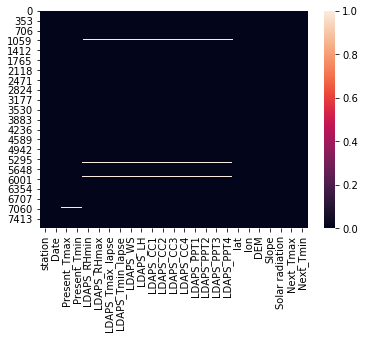

In [13]:
sns.heatmap(df.isnull())

#### EDA

In [14]:
plot = df.drop('Date',axis=1)

In [15]:
df = df[['Present_Tmax','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT4',
          'lat','lon','DEM','Slope','Solar radiation','Next_Tmax']]

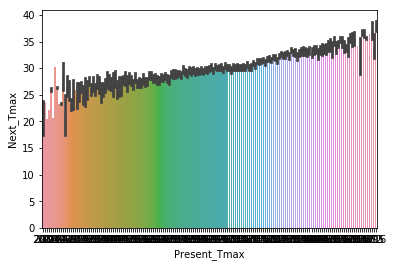

In [16]:
sns.barplot(x='Present_Tmax',y='Next_Tmax',data=df)

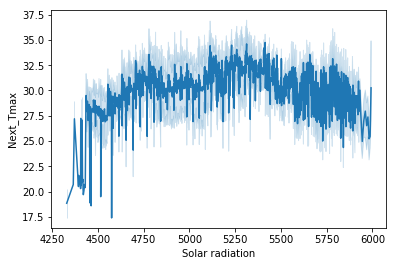

In [17]:
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)

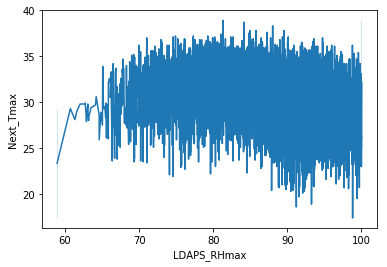

In [18]:
sns.lineplot(x='LDAPS_RHmax',y='Next_Tmax',data=df)

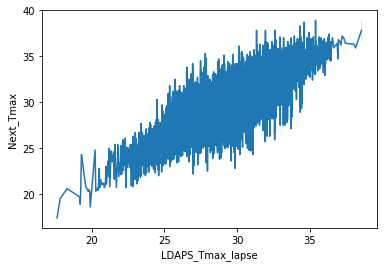

In [19]:
sns.lineplot(x='LDAPS_Tmax_lapse',y='Next_Tmax',data=df)

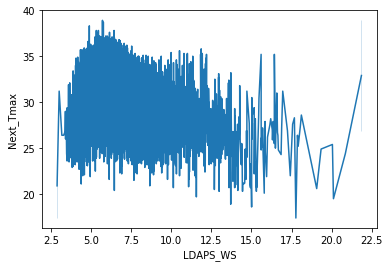

In [20]:
sns.lineplot(x='LDAPS_WS',y='Next_Tmax',data=df)

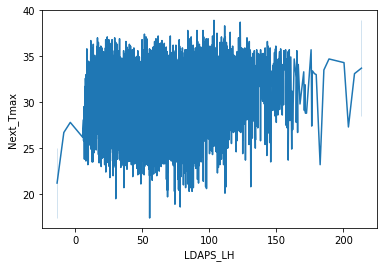

In [21]:
sns.lineplot(x='LDAPS_LH',y='Next_Tmax',data=df)

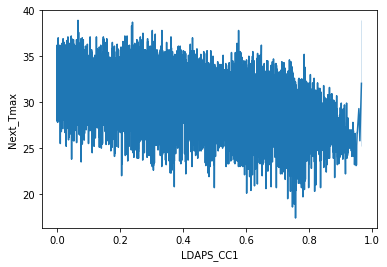

In [22]:
sns.lineplot(x='LDAPS_CC1',y='Next_Tmax',data=df)

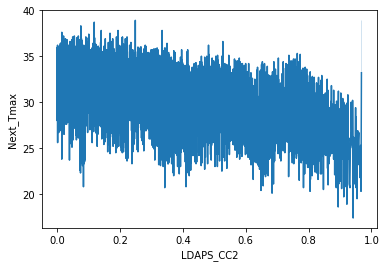

In [23]:
sns.lineplot(x='LDAPS_CC2',y='Next_Tmax',data=df)

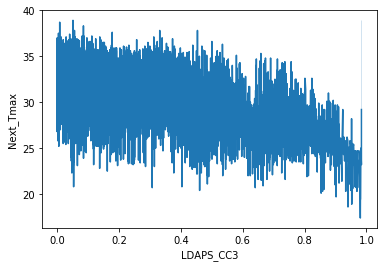

In [24]:
sns.lineplot(x='LDAPS_CC3',y='Next_Tmax',data=df)

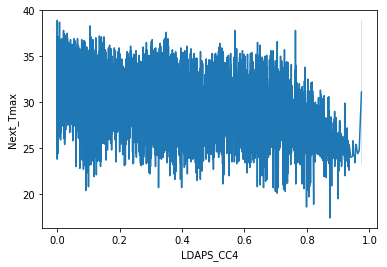

In [25]:
sns.lineplot(x='LDAPS_CC4',y='Next_Tmax',data=df)

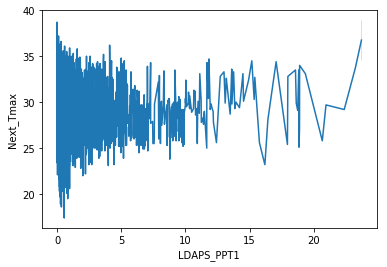

In [26]:
sns.lineplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

In [27]:
df.head()

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,28.7,91.116364,28.074101,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,31.9,90.604721,29.850689,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,31.6,83.973587,30.091292,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,32.0,96.483688,29.704629,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,31.4,90.155128,29.113934,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [28]:
df.tail()

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
7747,23.3,78.869858,26.352081,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3
7748,23.3,77.294975,27.010193,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6
7749,23.2,77.243744,27.939516,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8
7750,20.0,58.936283,17.624954,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4
7751,37.6,100.000153,38.542255,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 17 columns):
Present_Tmax        7682 non-null float64
LDAPS_RHmax         7677 non-null float64
LDAPS_Tmax_lapse    7677 non-null float64
LDAPS_WS            7677 non-null float64
LDAPS_LH            7677 non-null float64
LDAPS_CC1           7677 non-null float64
LDAPS_CC2           7677 non-null float64
LDAPS_CC3           7677 non-null float64
LDAPS_CC4           7677 non-null float64
LDAPS_PPT1          7677 non-null float64
LDAPS_PPT4          7677 non-null float64
lat                 7752 non-null float64
lon                 7752 non-null float64
DEM                 7752 non-null float64
Slope               7752 non-null float64
Solar radiation     7752 non-null float64
Next_Tmax           7725 non-null float64
dtypes: float64(17)
memory usage: 1.0 MB


In [30]:
df.describe()

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000
mean,29.768211,88.374804,29.613447,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887
std,2.969999,7.192004,2.947191,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010
min,20.000000,58.936283,17.624954,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000
25%,27.800000,84.222862,27.673499,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000
50%,29.900000,89.793480,29.703426,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000
75%,32.000000,93.743629,31.710450,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000
max,37.600000,100.000153,38.542255,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000


In [31]:
x = df.drop(['Next_Tmax'],axis=1)
x.head(2)

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,28.7,91.116364,28.074101,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,31.9,90.604721,29.850689,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500


In [32]:
x.replace(np.NaN,0,inplace=True)

In [33]:
x.isna().sum()

Present_Tmax        0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
dtype: int64

In [34]:
y = df['Next_Tmax']

In [35]:
y.replace(np.NaN,0,inplace=True)

In [36]:
y.isna().sum()

0

### Build model

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [39]:
x_train.shape

(6976, 16)

In [40]:
y_train.shape

(6976,)

In [41]:
from sklearn.linear_model import LinearRegression
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
model=[LinearRegression(),DecisionTreeRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  71  is  0.6751308063904964
DecisionTreeRegressor() max r2 score corresponding to  75  is  0.5772911425380202


In [44]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=84)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.9563557404371279
rf_accuracy: 0.96


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[0.77628258 0.81182998 0.81144271 0.84837416 0.84454078]


In [46]:
#Lets find the rmse and r2_score using sklearn.metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  2.5785630703420774
r2_score is:  0.5569164081576446


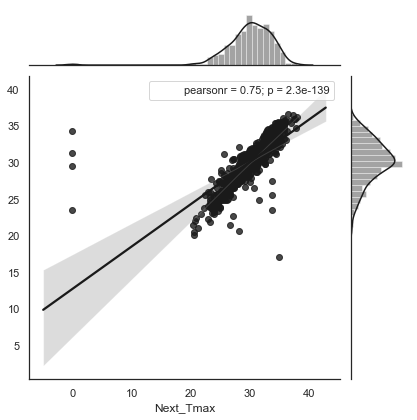

In [47]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [48]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
7261,31.5,31.161
40,27.5,27.739
4443,30.8,31.709
2996,28.9,29.868
5988,33.6,34.344


In [50]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'bias correction.joblib') 


['bias correction.joblib']